<a href="https://colab.research.google.com/github/Steve-YJ/Explore-Kaggle/blob/master/Day1_Titanic_Project_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Project Example Walk Through
This Notebook created by Ken Jee(a head Data Science at Scouts Consulting Group)<br>

* In this notebook we'll learn
    * how a data scientist would go about working through a problem
    * Goal: correctly predict if someone survived the Titanic shipwreck
    * Fun: without deep learning, how well he train the model

* Video
    * https://www.youtube.com/watch?v=I3FBJdiExcg

## Overview 
### 1) Understand the shape of the data (Histograms, box plots, etc.)

### 2) Data Cleaning 

### 3) Data Exploration

### 4) Feature Engineering 

### 5) Data Preprocessing for Model

### 6) Basic Model Building 

### 7) Model Tuning 

### 8) Ensemble Modle Building 

### 9) Results 

From my point of:<br>
At first glance, you can see that the modeling part is really simple. :)<br>
Data...Data...Data... for Preprocessing<br>
Build Model -> Model Tuning -> Make strong -> see the result
<br><br>

## Let's get it Started!!
---

In the colab environment, drive mount is performed.(If it is not a colab, pass it!)

## Drive Mount

In [1]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)  # force_remount=True: it will only automatically remount account A

! pwd

Mounted at /content/drive
/content


In [2]:
%cd /content/drive/My Drive/Kaggle-DataScience
! pwd
! ls

/content/drive/My Drive/Kaggle-DataScience
/content/drive/My Drive/Kaggle-DataScience
'01. Classification-Titanic.ipynb'   Dataset
'Basic for Kaggle'		    'Day1. Titanic Project Example.ipynb'


* add Autoreload
    * IPython: Autoreload
    * IPython extension to reload modules before executing user code.

In [3]:
%load_ext autoreload
%autoreload 2

## Import Library
* Import Libarary
* Load Data

In [4]:
import numpy as np               # for linear algebra
import pandas as pd              # for data processing
import seaborn as sns            # for data visualization
import matplotlib.pyplot as plt  # for data visualization

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


load train, test data


In [5]:
training = pd.read_csv('./Dataset/train.csv')
test = pd.read_csv('./Dataset/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN  
all_data = pd.concat([training, test])

# print all_data
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [6]:
print(training.shape)
print(test.shape)
print(all_data.shape)

(891, 13)
(418, 13)
(1309, 13)


* In the Library Import Part
    * load training data from pandas
    * load test data from pandas
    * make all_data: concat([training, test])
    

In [7]:
# If you need check, print it

# print(training.shape)
# print(test.shape)
# print(training.shape[0] + test.shape[0])
# print(all_data.shape)

## Project Planning
Ken said, When we starting any project, he like to outline steps that he plan to take.

In [8]:
# Understand nature of the data .info() .describe()
# Histogram and boxplots
# Value counts
# Missing data
# Correlation between the metrics
# Explore Interesting themes
    # Wealthy survive?
    # By location
    # Age scatterplot with ticket price
    # Young and wealthy Variable?
    # Total spent?
# Feature engineering
# preprocess data together or use a transfomer?
    # use label for train and test
# Scaling?
# Model Baseline
# Model comparison with CV

## Light Data Exploration
### 1) For numeric data
* Made histograms to understand distributions
* Corrplot: Corelation plot
* Pivot table comparing survival rate across numeric variables


### 2) For Categorical Data
* Made bar charts to understand balance of classes
* Made pivot table to understand relationship with survival

In [18]:
# quick look at our data types & null counts

training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Data Types: int64, object, float64<br>
Non-value: Age, Cabin, Embarked has non-values

In [19]:
# to better understand the numeric data, we want to use the .describe() method
# This gives us an understanding of the central tendencies of the data

training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [23]:
all_data.columns
# print(len(all_data.columns))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [20]:
# quick way to separate nemuric columns

training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [24]:
# look at numeric and categorical values separately

df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]


In [31]:
# df_num.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


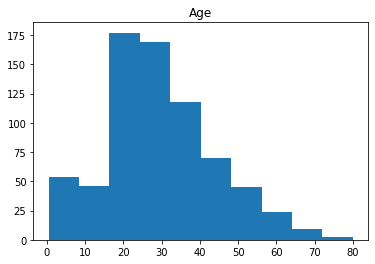

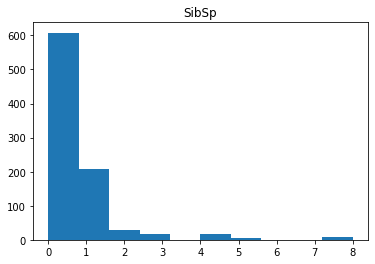

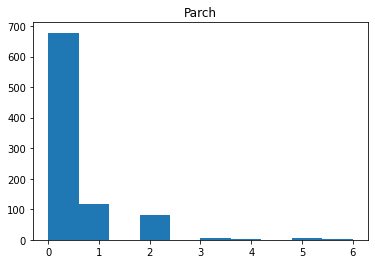

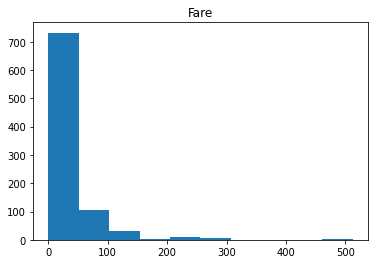

In [26]:
# distributions for all numeric variables

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Question. Perhaps we should take the non-normal distributions and consider normalizing them?

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


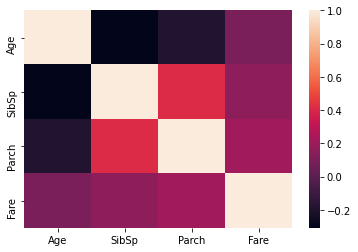

In [32]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [40]:
# compare survival rate across Age, SibSp, Parch, and Fare

pd.pivot_table(training, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


* <code>pandas.pivot_table()</code><br>
Create a spreadsheet-style pivot table as a DataFrame.<br>

* what is pivot table?
    * <a href='https://datascienceschool.net/view-notebook/76dcd63bba2c4959af15bec41b197e7c/#:~:text=%ED%94%BC%EB%B4%87%ED%85%8C%EC%9D%B4%EB%B8%94(pivot%20table)%EC%9D%B4%EB%9E%80,pivot%20%EB%A9%94%EC%84%9C%EB%93%9C%EB%A5%BC%20%EC%A0%9C%EA%B3%B5%ED%95%9C%EB%8B%A4.'>Pandas Pivot table-데이터 사이언스 스쿨</a>

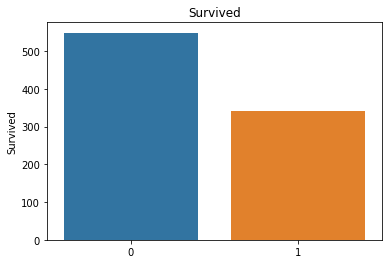

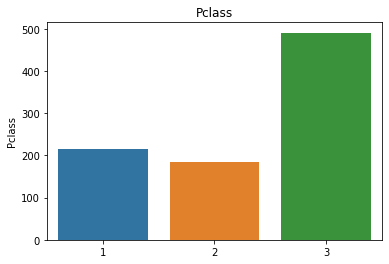

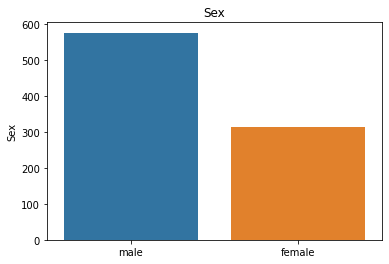

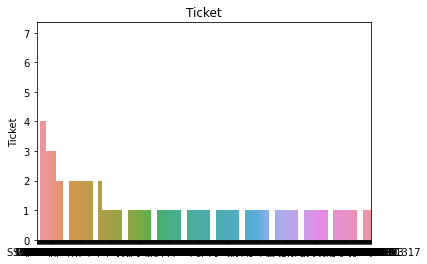

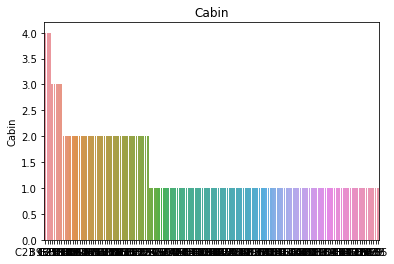

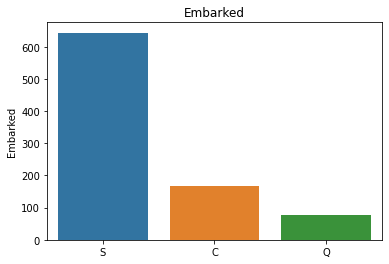

In [42]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

In [53]:
# Comparing survival and each of these categorical variables


print(pd.pivot_table(training, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## Feature Engineering
### 1) Cabin
### 2) Tickets
### Does a person's title relate to survival rates?

In [52]:
80+97+372+136+87+119

891

## Data Preprocessing for Model
### 1) Drop null values from Embarked

## Model Building(Baseline Validation Performance)

## Model Tuned Performance

## Model Additional Ensemble Approaches

* Pandas Pivot Table
    * from Data Science School

In [37]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns=["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


위의 데이터 <code>df1</code>에서 도시 이름이 열 인덱스가 되고 연도가 행 인덱스가 되도록 만들어보자

In [38]:
df1.pivot(index='도시', columns='연도', values='인구')

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0
